# Fitting real data to Arps and Wor Models

Most of the time you have to get the declination parameters by fitting the real data. Both Arps and Wor classes have the method `fit` to excecute the workflow. 


## Fit to Arps 

Import a sample production from a csv file and plot it.

In [1]:
import pandas as pd
import numpy as np
from dcapy import dca
from dcapy.filters import exp_wgh_avg
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime
np.seterr(divide='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
prod = pd.read_csv('prod.csv')
prod['date'] = pd.to_datetime(prod['date'], format='%Y-%m-%d')
print(prod.head())
print(prod.tail())
print(prod.shape)


        date    prod
0 2015-07-01  338.58
1 2015-07-02  339.75
2 2015-07-03  349.65
3 2015-07-04  357.48
4 2015-07-05  344.16
          date   prod
602 2017-02-27  97.47
603 2017-02-28  97.56
604 2017-03-01  97.65
605 2017-03-02  97.74
606 2017-03-03  97.92
(607, 2)


It is highly recommended to convert the date data to a datetime pandas format before pass it to the `fit` method

<AxesSubplot:xlabel='date', ylabel='prod'>

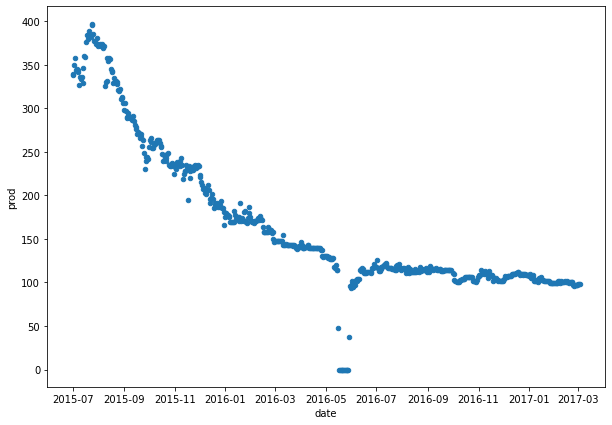

In [3]:
fig, ax = plt.subplots(figsize=(10,7))
prod.plot(x='date',y='prod', kind='scatter',ax=ax)

You can create an empty `Arps` instance and just define the frequency of the decline rate. As the input data format is a datetime, the `freq_di` is set on 'D'

By calling `fit` method with the dataframe containing the production information you have to indicate the columns name containing the time and rate.

In [4]:
d1 = dca.Arps(freq_di='D')
d1.fit(df=prod,time='date',rate='prod', beta=0.5)
d1

Declination 
 Ti: 2015-07-01 
 Qi: 407.6556078551238 bbl/d 
 Di: 0.0061166609125105275 D 
 b: 0.9285505938791447

The method tries to fit the data to Arps equation by tunning in this case the parameters `di` and `b`.

Once the data is fitted the instances is populated with those parameters and you can start to make forecast

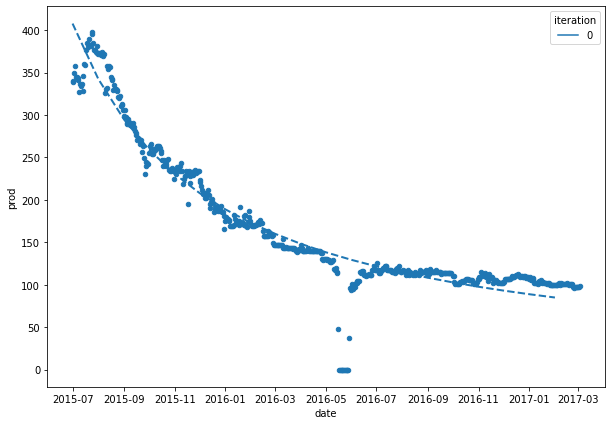

In [5]:
fig, ax = plt.subplots(figsize=(10,7))

prod.plot(x='date',y='prod', kind='scatter',ax=ax)

d1.plot(ax=ax, start=date(2015,7,1), end=date(2017,2,28))

### Fit data with a fix `b` value

If you'd like to fit the data specifically with a certain value of `b` parameter, you can declare it in the `fit`  method

Declination 
 Ti: 2015-07-01 
 Qi: 406.35680255401354 bbl/d 
 Di: 0.006157519157501374 D 
 b: 1.0


/Users/scuervo91/Documents/dev/dcapy/dcapy/dca/arps.py:87: RuntimeWarning: invalid value encountered in multiply
  return f*(g-h)


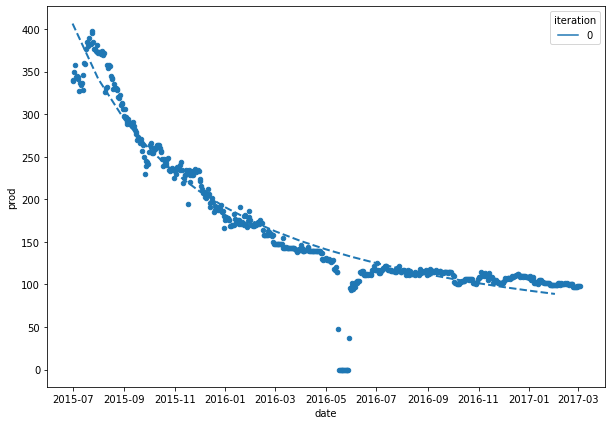

In [6]:
d2 = dca.Arps(freq_di='D')
filters = d2.fit(df=prod,time='date',rate='prod', b=1)
print(d2)

fig, ax = plt.subplots(figsize=(10,7))

prod.plot(x='date',y='prod', kind='scatter',ax=ax)

d2.plot(ax=ax, start=date(2015,7,1), end=date(2017,2,28))


Declination 
 Ti: 2015-07-01 
 Qi: 380.28249474984807 bbl/d 
 Di: 0.004172719889709341 D 
 b: 0.4999999999999999


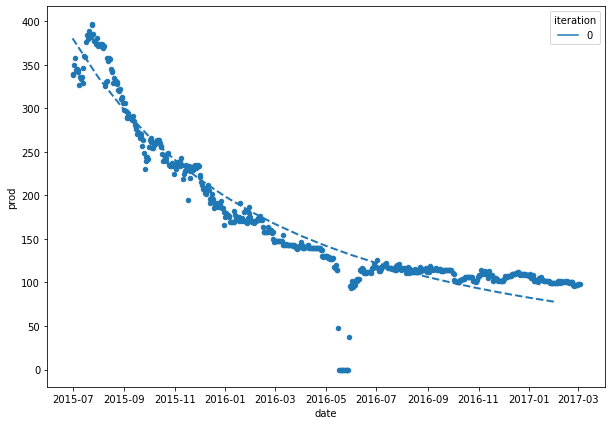

In [7]:
d2 = dca.Arps(freq_di='D')
filters = d2.fit(df=prod,time='date',rate='prod', b_bounds=[0.1,0.5])
print(d2)

fig, ax = plt.subplots(figsize=(10,7))

prod.plot(x='date',y='prod', kind='scatter',ax=ax)

d2.plot(ax=ax, start=date(2015,7,1), end=date(2017,2,28))

## Data Filtering

When passing data to the `fit` method it automatically filter production greater than zero to used by the fitting function. 



<AxesSubplot:xlabel='time', ylabel='oil_rate'>

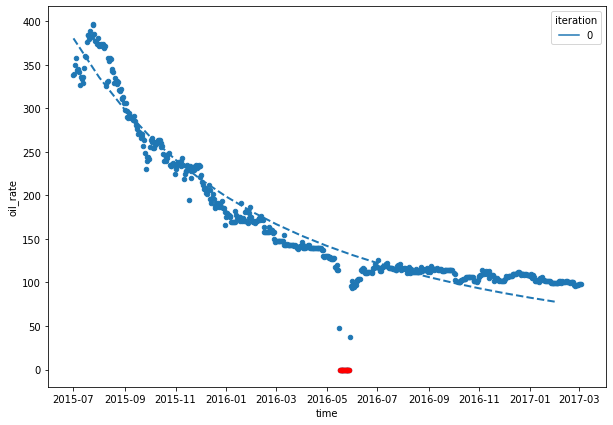

In [8]:
fig, ax = plt.subplots(figsize=(10,7))
prod.plot(x='date',y='prod', kind='scatter',ax=ax)

d2.plot(ax=ax, start=date(2015,7,1), end=date(2017,2,28))
filters.loc[filters['filter']==1].plot(x='time',y='oil_rate', kind='scatter',ax=ax, color='r')

If you want to apply another filter to remove possible outliers or anomaly data, you can use the `zscore` filter in the `dcapy.filters` module

In [9]:
from dcapy.filters import zscore

In [10]:
d3 = dca.Arps(freq_di='D')
f = d3.fit(df=prod,time='date',rate='prod', filter=zscore)
d3

Declination 
 Ti: 2015-07-01 
 Qi: 405.41476516605366 bbl/d 
 Di: 0.006069294137811537 D 
 b: 0.9871241473437588

<AxesSubplot:xlabel='time', ylabel='oil_rate'>

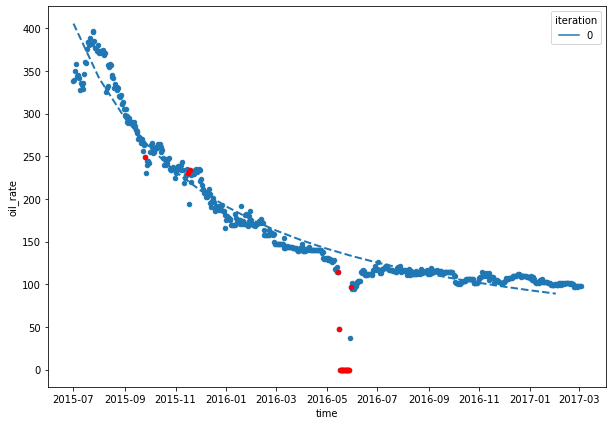

In [11]:
fig, ax = plt.subplots(figsize=(10,7))
prod.plot(x='date',y='prod', kind='scatter',ax=ax)

d3.plot(ax=ax, start=date(2015,7,1), end=date(2017,2,28))
f.loc[f['filter']==1].plot(x='time',y='oil_rate', kind='scatter',ax=ax, color='r')

In [12]:
d3 = dca.Arps(freq_di='D')
f = d3.fit(df=prod,time=prod.index.values,rate='prod', filter=zscore)
d3

Declination 
 Ti: 0 
 Qi: 405.1865720320772 bbl/d 
 Di: 0.006036089475311114 D 
 b: 0.9768008843670666

Fit data using dates with a custom declination frequency `freq_di`, which is different from the default frequency `D`.

Declination 
 Ti: 2021-01-01 
 Qi: 20.000000000000004 bbl/d 
 Di: 0.10000000000000019 M 
 b: 0.1000000000000047


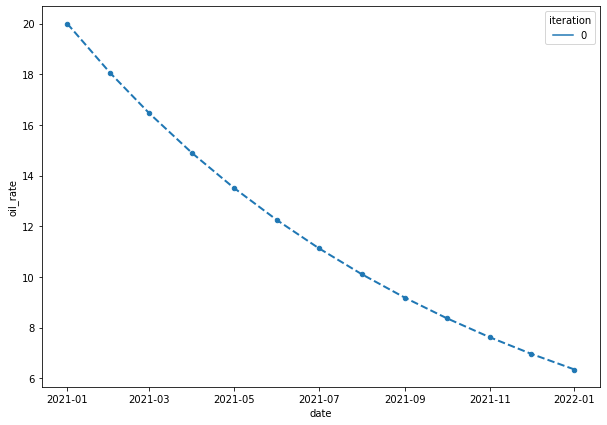

In [13]:
a3 = dca.Arps(
    ti = date(2021,1,1),
    qi = 20,
    di = 0.1,
    b = 0.1,
    freq_di='M',
    seed=42
)
a3

a4 = a3.forecast(start=date(2021,1,1),end=date(2022,1,1), freq_output='M', iter=10)
a4 = a4.reset_index()
a4['date'] = a4['date'].dt.to_timestamp()

d2 = dca.Arps(freq_di='M')
d2.fit(df=a4, time='date', rate='oil_rate',beta=1)
print(d2)

fig, ax = plt.subplots(figsize=(10,7))
a4.plot(x='date', y='oil_rate', kind='scatter',ax=ax)
d2.plot(ax=ax, start=date(2021,1,1), end=date(2022,1,1))

## Fit to WOR

Load the production data and estimate some parameters like Wor and Cumulative oil production


In [14]:
prod_wor = pd.read_csv('prod_wor.csv')
prod_wor['date'] = pd.to_datetime(prod_wor['date'], format='%Y-%m-%d')
prod_wor['fluid'] = prod_wor['oil'] + prod_wor['water']
prod_wor['wor'] = prod_wor['water'] / prod_wor['oil']
prod_wor['np'] = prod_wor['oil'].cumsum()
print(prod_wor.head())
print(prod_wor.tail())
print(prod_wor.shape)

        date    oil    water    fluid        wor      np
0 1990-08-29  52.90  1065.25  1118.15  20.137051   52.90
1 1990-08-30  66.10  1548.10  1614.20  23.420575  119.00
2 1990-08-31  85.35  1654.45  1739.80  19.384300  204.35
3 1990-09-01  79.95  1686.05  1766.00  21.088806  284.30
4 1990-09-02  84.15  1791.65  1875.80  21.291147  368.45
          date    oil    water    fluid        wor        np
235 1991-04-21  47.65  2552.65  2600.30  53.570829  19241.25
236 1991-04-22  47.15  2552.35  2599.50  54.132556  19288.40
237 1991-04-23  46.30  2554.65  2600.95  55.176026  19334.70
238 1991-04-24  46.30  2554.65  2600.95  55.176026  19381.00
239 1991-04-25  45.05  2557.15  2602.20  56.762486  19426.05
(240, 6)


When plotting you can identify two periods of production when the fluid rate is constant. We can extract the production profile after 1990-12. 

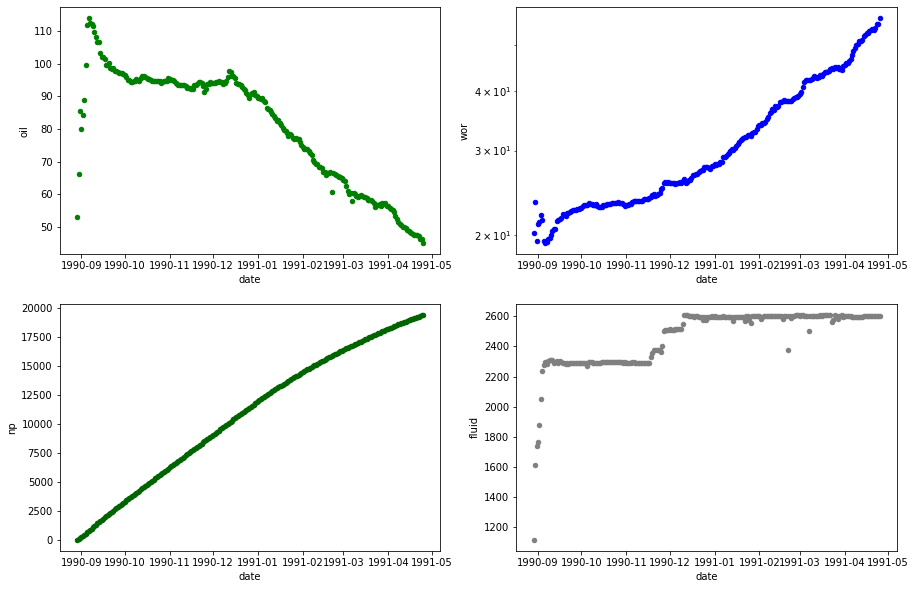

In [15]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
prod_wor.plot(x='date',y='oil', kind='scatter', ax=ax[0,0], color='g')
prod_wor.plot(x='date',y='wor', kind='scatter', ax=ax[0,1], color='b')
prod_wor.plot(x='date',y='np', kind='scatter', ax=ax[1,0], color='darkgreen')
prod_wor.plot(x='date',y='fluid', kind='scatter', ax=ax[1,1], color='grey')

ax[0,1].set_yscale('log')

In [16]:
prod_w1 = prod_wor[prod_wor['date']>=pd.Timestamp(1990,12,12)]
print(prod_w1.head())

          date    oil    water    fluid        wor        np
105 1990-12-12  97.70  2508.00  2605.70  25.670420  10121.30
106 1990-12-13  97.35  2508.65  2606.00  25.769389  10218.65
107 1990-12-14  96.20  2504.20  2600.40  26.031185  10314.85
108 1990-12-15  96.20  2506.10  2602.30  26.050936  10411.05
109 1990-12-16  95.45  2507.30  2602.75  26.268203  10506.50


The Wor fitting workflow is similar to Arps. Create an empty Wor instance, call the `fit` method with with the columns required.

In [17]:
wor_dec = dca.Wor()
wor_dec.fit(df=prod_w1[['date','oil','water']], time='date',oil_rate='oil',water_rate='water')
print(wor_dec)

bsw=0.9600600634231139 slope=8.181985964097689e-05 fluid_rate=2596.3974074074076 ti=datetime.date(1990, 12, 12) seed=None gor=None glr=None


Plot the results

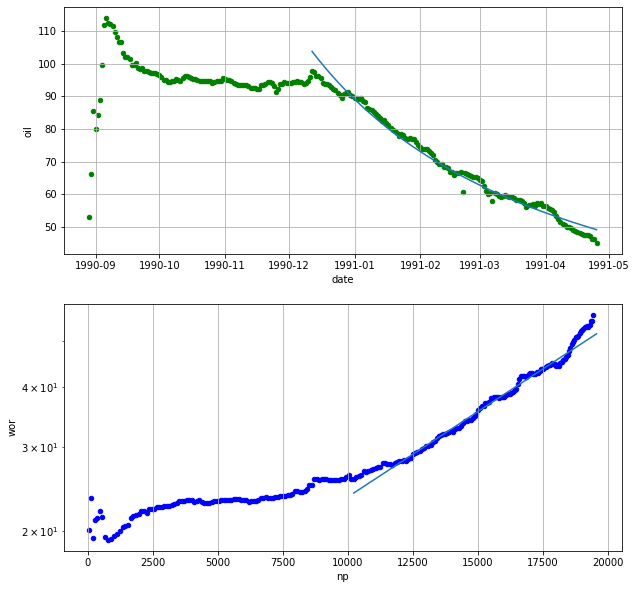

In [18]:
wor_forecast=wor_dec.forecast(start=date(1990,12,12),end=date(1991,4,25), cum_i=10121)
fig, ax = plt.subplots(2,1, figsize=(10,10))

prod_wor.plot(x='date',y='oil', kind='scatter', ax=ax[0], color='g')
sns.lineplot(data=wor_forecast.to_timestamp().reset_index(), x='date',y='oil_rate', ax=ax[0])


prod_wor.plot(x='np',y='wor', kind='scatter', ax=ax[1], color='b')
sns.lineplot(data=wor_forecast.to_timestamp().reset_index(), x='oil_cum',y='wor', ax=ax[1])
ax[1].set_yscale('log')

ax[0].grid()
ax[1].grid()